#### Importing libraries

In [1]:
# Log R, DT, RF
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.2f' % x)

#### Setting directory

In [2]:
os.chdir(r'C:\Users\Bushra Ansari\Desktop\LMS_DATASET\Hypothesis Testing Dataset')

In [3]:
os.listdir()

['bank.xlsx',
 'basicStat.xlsx',
 'bd.csv',
 'car_done.csv',
 'cr.csv',
 'details.xlsx',
 'diabetes.csv',
 'Diet_data.csv',
 'Entropy.xlsx',
 'Fertilizer.csv',
 'LifeSpan.csv',
 'LoansData.csv',
 'Model 4 - reference.ipynb',
 'Production.csv',
 'Sleep_data.csv',
 'Strength.csv',
 'TaxiFare1.csv',
 'test_profile.xlsx',
 'Test_RiskScore.xlsx',
 'train_prof.xlsx',
 'train_profile.xlsx',
 'Train_RiskScore.csv',
 'veh1.xlsx',
 'veh11.csv',
 'vehicles.csv']

In [4]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetes.shape

(768, 9)

In [7]:
diabetes[diabetes['Glucose'] == 0].shape

(5, 9)

#### Checking missing values

In [8]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No missing values in the dataset.

In [9]:
display(diabetes['Glucose'].mean(), diabetes['Glucose'].mode(), diabetes['Glucose'].median())

120.89453125

0     99
1    100
dtype: int64

117.0

In [10]:
diabetes['Glucose'] = np.where(diabetes['Glucose'] == 0, np.nan, diabetes['Glucose'])

In [11]:
diabetes['Glucose'].fillna(diabetes['Glucose'].median(), inplace = True)

<AxesSubplot:ylabel='Frequency'>

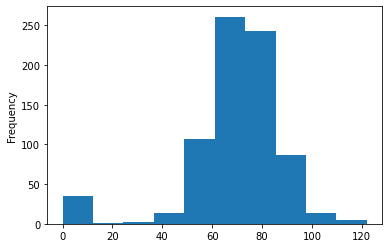

In [12]:
diabetes['BloodPressure'].plot(kind = 'hist')

In [13]:
diabetes[diabetes['BloodPressure'] == 0].shape

(35, 9)

In [14]:
diabetes['BloodPressure'] = np.where(diabetes['BloodPressure'] == 0, np.nan, diabetes['BloodPressure'])

In [15]:
display(diabetes['BloodPressure'].mean(), diabetes['BloodPressure'].mode(), diabetes['BloodPressure'].median())

72.40518417462484

0   70.00
dtype: float64

72.0

In [16]:
diabetes['BloodPressure'].fillna(diabetes['BloodPressure'].median(), inplace = True)

In [17]:
diabetes[diabetes['SkinThickness'] == 0].shape

(227, 9)

In [18]:
diabetes['SkinThickness'] = np.where(diabetes['SkinThickness'] == 0, np.nan, diabetes['SkinThickness'])

<AxesSubplot:ylabel='Frequency'>

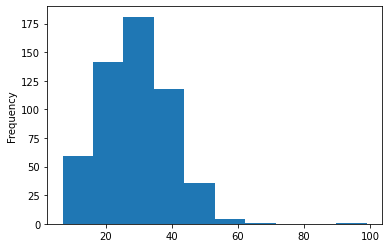

In [19]:
diabetes['SkinThickness'].plot(kind = 'hist')

In [20]:
display(diabetes['SkinThickness'].mean(), diabetes['SkinThickness'].mode(), diabetes['SkinThickness'].median())

29.153419593345657

0   32.00
dtype: float64

29.0

In [21]:
diabetes['SkinThickness'].fillna(diabetes['SkinThickness'].median(), inplace = True)

In [22]:
diabetes['Insulin'] = np.where(diabetes['Insulin'] == 0, np.nan, diabetes['Insulin'])

In [23]:
diabetes['Insulin'].isnull().sum()

374

<AxesSubplot:ylabel='Frequency'>

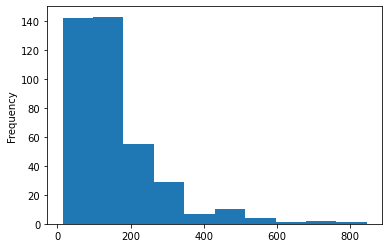

In [24]:
diabetes['Insulin'].plot(kind = 'hist')

In [25]:
display(diabetes['Insulin'].mean(), diabetes['Insulin'].mode(), diabetes['Insulin'].median())

155.5482233502538

0   105.00
dtype: float64

125.0

In [26]:
diabetes['Insulin'].fillna(diabetes['Insulin'].median(), inplace = True)

<AxesSubplot:ylabel='Frequency'>

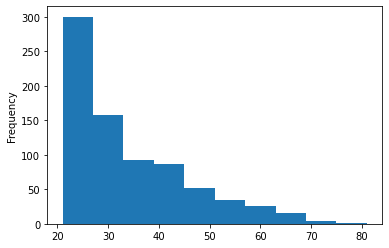

In [27]:
diabetes['Age'].plot(kind = 'hist')

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

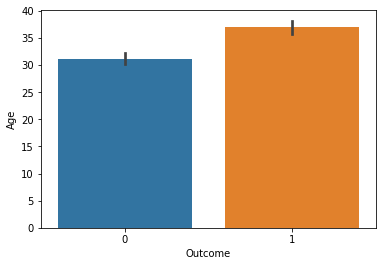

In [28]:
sns.barplot(x = 'Outcome', y = 'Age', data = diabetes, estimator = np.mean)

In [29]:
diabetes[diabetes['BMI'] == 0].shape

(11, 9)

In [30]:
diabetes['BMI'] = np.where(diabetes['BMI'] == 0, np.nan, diabetes['BMI'])

In [31]:
display(diabetes['BMI'].mean(), diabetes['BMI'].mode(), diabetes['BMI'].median())

32.45746367239099

0   32.00
dtype: float64

32.3

In [32]:
diabetes['BMI'].fillna(diabetes['BMI'].median(), inplace = True)

#### Checking Outliers

In [33]:
diabetes.describe(percentiles = [0.01,0.02,0.03,0.04,0.05,0.1,0.25,0.50,0.75,0.9,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Pregnancies,768.00,3.85,3.37,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,3.00,6.00,9.00,10.00,11.00,11.00,12.00,13.00,17.00
Glucose,768.00,121.66,30.44,44.00,67.67,72.34,75.00,78.00,80.00,86.70,99.75,117.00,140.25,167.00,181.00,184.00,187.99,192.32,196.00,199.00
BloodPressure,768.00,72.39,12.10,24.00,44.00,48.68,50.00,52.00,52.00,58.00,64.00,72.00,80.00,88.00,90.00,92.00,94.99,99.32,106.00,122.00
SkinThickness,768.00,29.11,8.79,7.00,10.00,12.00,13.00,13.00,14.35,18.00,25.00,29.00,32.00,40.00,44.00,45.32,46.00,48.00,51.33,99.00
Insulin,768.00,140.67,86.38,14.00,24.34,37.34,44.00,48.00,50.00,67.00,121.50,125.00,127.25,210.00,293.00,325.00,369.90,470.94,519.90,846.00
BMI,768.00,32.46,6.88,18.20,19.50,20.40,21.10,21.80,22.23,24.00,27.50,32.30,36.60,41.50,44.39,45.33,46.10,47.53,50.76,67.10
DiabetesPedigreeFunction,768.00,0.47,0.33,0.08,0.09,0.12,0.13,0.13,0.14,0.17,0.24,0.37,0.63,0.88,1.13,1.18,1.26,1.39,1.70,2.42
Age,768.00,33.24,11.76,21.00,21.00,21.00,21.00,21.00,21.00,22.00,24.00,29.00,41.00,51.00,58.00,60.00,62.00,64.66,67.00,81.00
Outcome,768.00,0.35,0.48,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


#### Treating Outliers

In [34]:
diabetes['Pregnancies'] = np.where(diabetes['Pregnancies'] > 10.00 , 10.00, diabetes['Pregnancies'])

In [35]:
diabetes['BloodPressure'] = np.where(diabetes['BloodPressure'] < 44.00 , 44.00, diabetes['BloodPressure'])
diabetes['BloodPressure'] = np.where(diabetes['BloodPressure'] > 106.00 , 106.00, diabetes['BloodPressure'])

In [36]:
diabetes['SkinThickness'] = np.where(diabetes['SkinThickness'] > 51.33 , 51.33, diabetes['SkinThickness'])

In [37]:
diabetes['Insulin'] = np.where(diabetes['Insulin'] > 519.90 , 519.90, diabetes['Insulin'])

In [38]:
diabetes['DiabetesPedigreeFunction'] = np.where(diabetes['DiabetesPedigreeFunction'] > 1.00 , 1.00, diabetes['DiabetesPedigreeFunction'])

In [39]:
diabetes['Age'] = np.where(diabetes['Age'] > 67.00 , 67.00, diabetes['Age'])

#### Checking Correlation

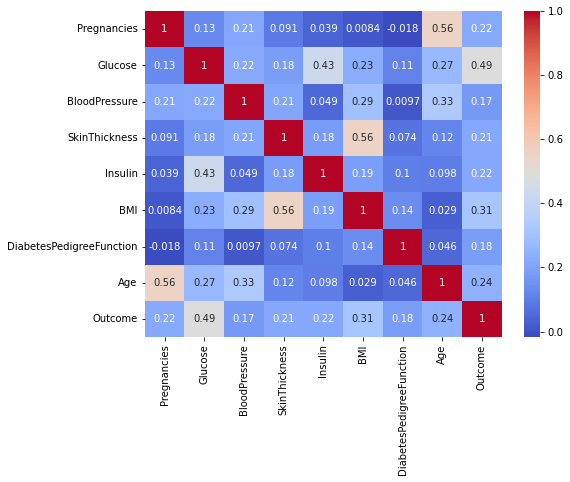

In [40]:
cr = diabetes.corr()
plt.figure(figsize = [8,6])
sns.heatmap(cr, annot = True, cmap = 'coolwarm')
plt.show()

In [41]:
y = diabetes['Outcome']
x = diabetes.drop(['Outcome'], axis = 1)

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state= 88)

### Logistic Regression 

In [44]:
diabetes['Outcome'].value_counts(normalize = True)

0   0.65
1   0.35
Name: Outcome, dtype: float64

In [45]:
y_train.value_counts(normalize= True)

0   0.64
1   0.36
Name: Outcome, dtype: float64

In [46]:
y_test.value_counts(normalize= True)

0   0.67
1   0.33
Name: Outcome, dtype: float64

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [48]:
log = LogisticRegression( max_iter= 1000)
log.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [49]:
print(f'Training score : {log.score(x_train, y_train)}')
print(f'Testing score : {log.score(x_test, y_test)}')

Training score : 0.7864583333333334
Testing score : 0.75


#### Model Evaluation

In [98]:
pred_train = log.predict(x_train)
pred_test = log.predict(x_test)

In [51]:
CMTrain = pd.DataFrame(metrics.confusion_matrix(y_train, pred_train), columns = ['Pred 0', 'Pred 1'], 
                       index = ['Act 0', 'Act 1'])
CMTrain

,Pred 0,Pred 1
Act 0,332,39
Act 1,84,121


In [52]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       371
           1       0.76      0.59      0.66       205

    accuracy                           0.79       576
   macro avg       0.78      0.74      0.75       576
weighted avg       0.78      0.79      0.78       576



In [53]:
CMTest = pd.DataFrame(metrics.confusion_matrix(y_test, pred_test), columns = ['Pred 0', 'Pred 1'], 
                       index = ['Act 0', 'Act 1'])
CMTest

,Pred 0,Pred 1
Act 0,111,18
Act 1,30,33


In [54]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       129
           1       0.65      0.52      0.58        63

    accuracy                           0.75       192
   macro avg       0.72      0.69      0.70       192
weighted avg       0.74      0.75      0.74       192



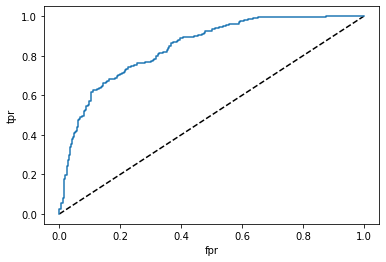

In [55]:
# Receiver Operating Characterestics 

probs=log.predict_proba(x_train)[:,1]

fpr, tpr, threshold=metrics.roc_curve(y_train,probs )
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='logistic')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [56]:
metrics.roc_auc_score(y_train,probs) 

0.8432713168102031

In [99]:
models_report=pd.DataFrame()

tmp3 = pd.Series({'Model': " Logistic Regression ",
                 'ROC Score' : metrics.roc_auc_score(y_test, pred_test),
                 'Precision Score': metrics.precision_score(y_test, pred_test),
                 'Recall Score': metrics.recall_score(y_test, pred_test),
                 'Accuracy Score': metrics.accuracy_score(y_test, pred_test)})

model_logR_report = models_report.append(tmp3, ignore_index = True)
model_logR_report

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score
0,Logistic Regression,0.69,0.65,0.52,0.75


### Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier
drt = DecisionTreeClassifier()
drt.fit(x_train, y_train)

print(f'Training score : {drt.score(x_train, y_train)}')
print(f'Testing score : {drt.score(x_test, y_test)}')

Training score : 1.0
Testing score : 0.71875


In [58]:
from sklearn.model_selection import GridSearchCV
params= {"criterion": ["gini", "entropy"],
       "max_depth": [6,8,10,12,15],
       "min_samples_split":[10,50,100,150,200],
       "min_samples_leaf":[5,10,20,50]}

dt_cv= DecisionTreeClassifier()
Gsearch_dt= GridSearchCV(estimator= dt_cv,param_grid= params, cv=10, n_jobs=-1, verbose= 1,scoring= "accuracy")

Gsearch_dt.fit(x_train, y_train)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 8, 10, 12, 15],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'min_samples_split': [10, 50, 100, 150, 200]},
             scoring='accuracy', verbose=1)

In [59]:
Gsearch_dt.best_score_

0.7690562613430126

In [60]:
Gsearch_dt.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 50,
 'min_samples_split': 10}

In [61]:
from sklearn.model_selection import GridSearchCV
params= {"criterion": ["gini", "entropy"],
       "max_depth": [6,8,10],
       "min_samples_split":[10,50,100],
       "min_samples_leaf":[70,80,90,100,110]}

dt_cv= DecisionTreeClassifier()
Gsearch_dt= GridSearchCV(estimator= dt_cv,param_grid= params, cv=10, n_jobs=-1, verbose= 1,scoring= "accuracy")

Gsearch_dt.fit(x_train, y_train)

Fitting 10 folds for each of 90 candidates, totalling 900 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 8, 10],
                         'min_samples_leaf': [70, 80, 90, 100, 110],
                         'min_samples_split': [10, 50, 100]},
             scoring='accuracy', verbose=1)

In [62]:
Gsearch_dt.best_score_

0.7725347852389595

In [63]:
Gsearch_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 70,
 'min_samples_split': 10}

In [58]:
drt1 = DecisionTreeClassifier(criterion= 'entropy', max_depth= 6, min_samples_leaf= 70, min_samples_split= 10)

drt1.fit(x_train, y_train)

print(f'Training score : {drt1.score(x_train, y_train)}')
print(f'Testing score : {drt1.score(x_test, y_test)}')

Training score : 0.7760416666666666
Testing score : 0.7604166666666666


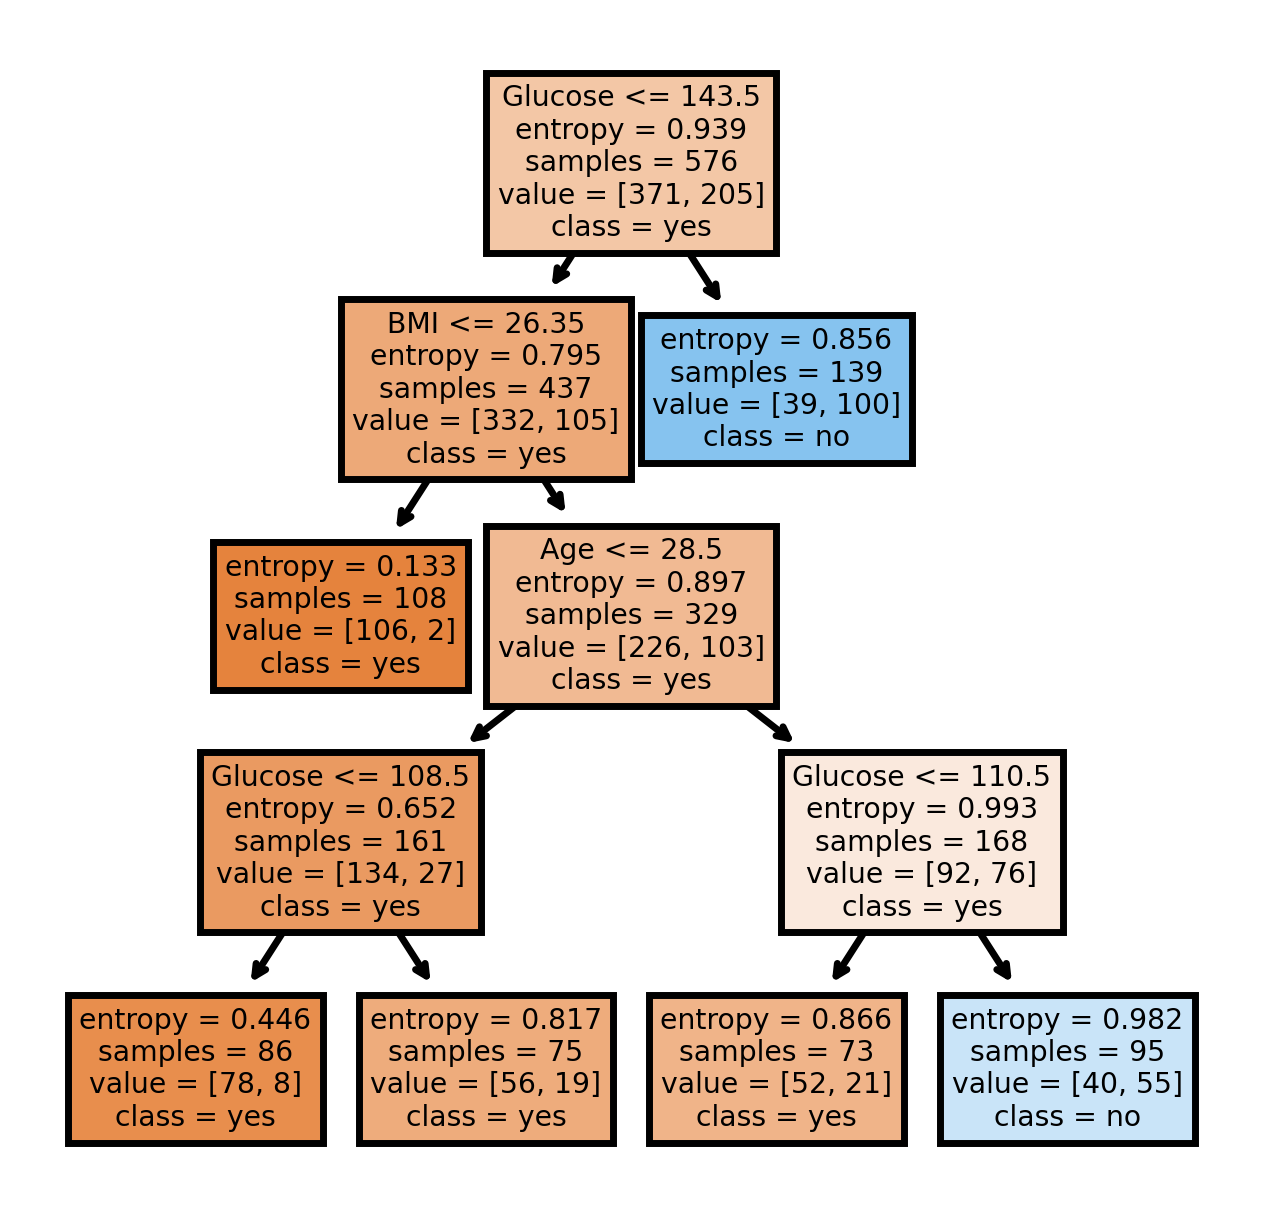

In [59]:
from sklearn.tree import plot_tree

fn=x_train.columns

cn=["yes","no"] 

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=500)

plot_tree(drt1,
           feature_names = fn, 
           class_names=cn,
           filled = True);

In [60]:
pred_train = drt1.predict(x_train)
pred_test = drt1.predict(x_test)

#### Model Evaluation

In [61]:
CMTrain = pd.DataFrame(metrics.confusion_matrix(y_train, pred_train), columns = ['Pred 0', 'Pred 1'],
                      index = ['Act 0', 'Act 1'])
CMTrain

,Pred 0,Pred 1
Act 0,292,79
Act 1,50,155


In [62]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       371
           1       0.66      0.76      0.71       205

    accuracy                           0.78       576
   macro avg       0.76      0.77      0.76       576
weighted avg       0.79      0.78      0.78       576



In [63]:
CMTest = pd.DataFrame(metrics.confusion_matrix(y_test, pred_test), columns = ['Pred 0', 'Pred 1'],
                      index = ['Act 0', 'Act 1'])
CMTest

,Pred 0,Pred 1
Act 0,104,25
Act 1,21,42


In [64]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       129
           1       0.63      0.67      0.65        63

    accuracy                           0.76       192
   macro avg       0.73      0.74      0.73       192
weighted avg       0.76      0.76      0.76       192



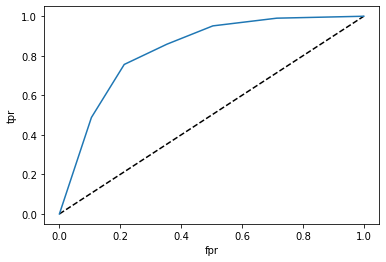

In [65]:
probs=drt1.predict_proba(x_train)[:,1]
fpr, tpr, threshold=metrics.roc_curve(y_train,probs )
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [66]:
metrics.roc_auc_score(y_train,probs) 

0.8308460982183947

In [67]:
def evaluate(y,predY):
    cm= metrics.confusion_matrix(y,predY)
    accuracy= (cm[0,0]+cm[1,1])/cm.sum()
    recall_1= (cm[1,1])/(cm[1,1]+cm[1,0])
    fg= pd.DataFrame({"Accuracy":pd.Series(accuracy),
                 "Recall_1":pd.Series(recall_1)})
    return fg

In [68]:
evaluate(y_train, pred_train)

,Accuracy,Recall_1
0,0.78,0.76


In [69]:
evaluate(y_test, pred_test)

,Accuracy,Recall_1
0,0.76,0.67


In [70]:
drt1.feature_importances_

array([0.        , 0.59520203, 0.        , 0.        , 0.        ,
       0.25251144, 0.        , 0.15228653])

In [71]:
df= pd.DataFrame({"Var":x_train.columns, "Imp":drt1.feature_importances_}).sort_values(by=["Imp"], ascending=False)
df

,Var,Imp
1,Glucose,0.60
5,BMI,0.25
7,Age,0.15
0,Pregnancies,0.00
2,BloodPressure,0.00
3,SkinThickness,0.00
4,Insulin,0.00
6,DiabetesPedigreeFunction,0.00


In [72]:
imp= df[df["Imp"]>=0.15]

In [73]:
imp['Var'].values

array(['Glucose', 'BMI', 'Age'], dtype=object)

In [74]:
imp_feat = ['Glucose', 'BMI', 'Age']
xx1= x_train[imp_feat]
xx2= x_test[imp_feat] 

In [75]:
drt2 = DecisionTreeClassifier(criterion= 'entropy', max_depth= 6, min_samples_leaf= 70, min_samples_split= 10)

drt2.fit(xx1, y_train)

print(f'Training score : {drt2.score(xx1, y_train)}')
print(f'Testing score : {drt2.score(xx2, y_test)}')

Training score : 0.7760416666666666
Testing score : 0.7604166666666666


In [77]:
models_report=pd.DataFrame()

tmp1 = pd.Series({'Model': " Decision Tree ",
                 'ROC Score' : metrics.roc_auc_score(y_test, pred_test),
                 'Precision Score': metrics.precision_score(y_test, pred_test),
                 'Recall Score': metrics.recall_score(y_test, pred_test),
                 'Accuracy Score': metrics.accuracy_score(y_test, pred_test)})

model_dt_report = models_report.append(tmp1, ignore_index = True)
model_dt_report

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score
0,Decision Tree,0.74,0.63,0.67,0.76


### Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

print(f'Training score : {rfc.score(x_train, y_train)}')
print(f'Testing score : {rfc.score(x_test, y_test)}')

Training score : 1.0
Testing score : 0.7552083333333334


In [81]:
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth':[7,10],
              'min_samples_split':[6,10],
              'n_estimators':[150,200],
              'bootstrap': [True, False],
              'max_features': ['auto', 'log2', None],
              'criterion': ['entropy', 'gini']}

fit_rf = RandomForestClassifier(random_state=42)

cv_rf = GridSearchCV(fit_rf, cv = 5, param_grid= param_dist, n_jobs = -1, verbose=1)

cv_rf.fit(x_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


C:\Users\Bushra Ansari\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['entropy', 'gini'], 'max_depth': [7, 10],
                         'max_features': ['auto', 'log2', None],
                         'min_samples_split': [6, 10],
                         'n_estimators': [150, 200]},
             verbose=1)

In [82]:
cv_rf.best_score_

0.7638680659670165

In [83]:
cv_rf.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'min_samples_split': 6,
 'n_estimators': 150}

In [86]:
rf1 =RandomForestClassifier(n_estimators= cv_rf.best_params_['n_estimators'],
                           max_depth= cv_rf.best_params_['max_depth'], 
                           criterion= cv_rf.best_params_["criterion"],
                           min_samples_split= cv_rf.best_params_["min_samples_split"],
                           max_features= cv_rf.best_params_["max_features"],
                           bootstrap= cv_rf.best_params_["bootstrap"])

rf1.fit(x_train, y_train)

print("Train Accuracy :", rf1.score(x_train,y_train))
print("Test Accuracy :", rf1.score(x_test,y_test))

C:\Users\Bushra Ansari\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Train Accuracy : 0.8993055555555556
Test Accuracy : 0.7760416666666666


In [87]:
pred_train_rf= rf1.predict(x_train)
pred_test_rf= rf1.predict(x_test)

#### Model Evaluation

In [88]:
print(metrics.classification_report(y_train, pred_train_rf))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       371
           1       0.88      0.82      0.85       205

    accuracy                           0.90       576
   macro avg       0.90      0.88      0.89       576
weighted avg       0.90      0.90      0.90       576



In [89]:
print(metrics.classification_report(y_test, pred_test_rf))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       129
           1       0.68      0.60      0.64        63

    accuracy                           0.78       192
   macro avg       0.75      0.73      0.74       192
weighted avg       0.77      0.78      0.77       192



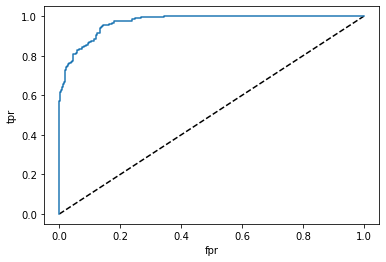

In [90]:
probs= rf1.predict_proba(x_train)[:,1]
fpr, tpr, threshold=metrics.roc_curve(y_train,probs )
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [91]:
metrics.roc_auc_score(y_train,probs) 

0.9699691013082637

In [92]:
def evaluate(y,predY):
    cm= metrics.confusion_matrix(y,predY)
    accuracy= (cm[0,0]+cm[1,1])/cm.sum()
    recall_1= (cm[1,1])/(cm[1,1]+cm[1,0])
    fg= pd.DataFrame({"Accuracy":pd.Series(accuracy),
                 "Recall_1":pd.Series(recall_1)})
    return fg

In [93]:
evaluate(y_train, pred_train_rf)

,Accuracy,Recall_1
0,0.90,0.82


In [94]:
evaluate(y_test, pred_test_rf)

,Accuracy,Recall_1
0,0.78,0.60


In [95]:
rf1.feature_importances_

array([0.06097699, 0.29251485, 0.06180263, 0.06105111, 0.09061102,
       0.18998499, 0.09936823, 0.14369018])

In [96]:
df= pd.DataFrame({"Var":x_train.columns, "Imp": rf1.feature_importances_}).sort_values(by=["Imp"], ascending=False)
df

,Var,Imp
1,Glucose,0.29
5,BMI,0.19
7,Age,0.14
6,DiabetesPedigreeFunction,0.10
4,Insulin,0.09
2,BloodPressure,0.06
3,SkinThickness,0.06
0,Pregnancies,0.06


In [97]:
tmp2 = pd.Series({'Model': " Random Forest ",
                 'ROC Score' : metrics.roc_auc_score(y_test, pred_test_rf),
                 'Precision Score': metrics.precision_score(y_test, pred_test_rf),
                 'Recall Score': metrics.recall_score(y_test, pred_test_rf),
                 'Accuracy Score': metrics.accuracy_score(y_test, pred_test_rf)})

model_rf_report = models_report.append(tmp2, ignore_index = True)
model_rf_report

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score
0,Random Forest,0.73,0.68,0.60,0.78


#### Models Comparison

In [101]:
cols = ['Model', 'ROC Score', 'Precision Score', 'Recall Score', 'Accuracy Score']
model = pd.DataFrame(columns = cols)
model = model.append([model_rf_report, model_dt_report, model_logR_report], ignore_index=True)
model

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score
0,Random Forest,0.73,0.68,0.60,0.78
1,Decision Tree,0.74,0.63,0.67,0.76
2,Logistic Regression,0.69,0.65,0.52,0.75
